### An exmaple notebook for importing Raman spectra in .spc file format, performing principle component analysis (PCA) and plotting the spectra

1. Import Python package that are required for analysis. The 'functions' prefix is pointing to the folder containing the custom functions.

In [2]:
import pandas as pd # python's no.1 pacakge for manipulating data
import glob
import os
import matplotlib.pyplot as plt # python's plotting package
import functions.spc as spc # custom function for reading .spc files and converting to a dataframe
import functions.base_corr as base_corr # custom function for performing basline correction of spectra
from sklearn.decomposition import PCA # sklearn is python's no.1 package for machine learning
from sklearn.preprocessing import StandardScaler

2. Define the path (directory) to the folder containing the files.

In [3]:
path = '/Users/leebarrett/Documents/data_projects/read_raman/data/20131003 Samples C1-12/'

In [4]:
if not os.path.exists(path):
    raise OSError(f"Directory: '{path}' not found. Please check directory and try again.")

3. Import all the .spc files from the path.

In [5]:
files = glob.glob(f"{path}*.spc")

4. Convert the .spc files to a Pandas dataframe

In [6]:
spc = [spc.read_spc(file, "wide") for file in files]

gx-y(1)
gx-y(1)
gx-y(1)
gx-y(1)
gx-y(1)
gx-y(1)
gx-y(1)
gx-y(1)
gx-y(1)
gx-y(1)
gx-y(1)
gx-y(1)


5. Join all the dataframes together

In [7]:
df = pd.concat(spc).reset_index()

6. Get the baseline for each spetrum uing ALS algorithm defined in the base_corr.py module. Parameters passed to .baseline_als_optimized() could be played around with.

In [8]:
bline = []

for index, row in df.iloc[:, 1:].iterrows():

    bline.append(
        base_corr.baseline_als_optimized(row.values, 10000, 0.0025)
    )


7. Perform basline correction on original data.

In [9]:
bcorr = []

for index, row in df.iloc[:, 1:].iterrows():
    bcorr.append(
        row.values-bline[index]
        )

In [10]:
bcorr

[array([ 8.9477978 , 10.14140153, 11.33500302, ..., 49.32648965,
        53.57489046, 57.82327682]),
 array([ 6.09753093,  7.37267345,  8.64781444, ..., 53.43006352,
        56.67785989, 58.92564154]),
 array([10.37430364, 11.53262697, 11.6909477 , ..., 28.25163136,
        30.55663029, 31.86162125]),
 array([11.31283611, 12.56618215, 13.81952537, ..., 43.15208925,
        46.27168698, 48.39127262]),
 array([ 4.37159091,  5.56361707,  6.75564214, ..., 42.67685838,
        45.97909681, 47.28132343]),
 array([ 3.10125826,  3.29080975,  4.48036047, ..., 51.31217759,
        55.41628284, 58.52037345]),
 array([ 6.85065827,  7.10241368,  8.35416737, ..., 48.25294949,
        51.54889865, 52.84483461]),
 array([ 9.03562274, 10.25478203, 12.47393907, ..., 37.40998747,
        40.58303792, 42.75607768]),
 array([11.35875518, 11.54384006, 11.7289221 , ..., 46.31305712,
        50.50593911, 53.69880767]),
 array([ 6.442428  ,  7.78088537, 10.11934113, ..., 67.52195682,
        72.35150443, 76.18

8. Create new dataframe with basline corrected spectra.

In [11]:
df2 = pd.DataFrame(bcorr, columns=df.columns[1:])

display(df2.head())

,1000.0,1000.5,1001.0,1001.5,1002.0,1002.5,1003.0,1003.5,1004.0,1004.5,...,1595.5,1596.0,1596.5,1597.0,1597.5,1598.0,1598.5,1599.0,1599.5,1600.0
0,8.947798,10.141402,11.335003,13.528598,14.722177,16.915732,17.109246,18.302700,18.496073,19.689335,...,25.583549,26.833432,28.082890,29.332008,33.580862,38.829521,44.078047,49.326490,53.574890,57.823277
1,6.097531,7.372673,8.647814,10.922951,12.198076,13.473183,13.748260,13.023293,13.298262,13.573148,...,29.691072,32.940469,36.189399,39.437957,42.686231,46.934298,50.182224,53.430064,56.677860,58.925642
2,10.374304,11.532627,11.690948,11.849260,13.007557,13.165825,13.324051,13.482216,12.640300,12.798278,...,15.114269,17.420126,18.725732,21.031140,22.336396,24.641540,26.946609,28.251631,30.556630,31.861621
3,11.312836,12.566182,13.819525,16.072860,17.326176,18.579461,18.832696,19.085859,19.338923,20.591856,...,22.311317,25.432212,28.552730,30.672947,33.792934,36.912752,40.032456,43.152089,46.271687,48.391273
4,4.371591,5.563617,6.755642,7.947664,9.139677,10.331677,11.523655,12.715599,12.907496,14.099328,...,22.557632,25.861161,29.164312,32.467164,34.769786,38.072242,40.374585,42.676858,45.979097,47.281323


9. Plot the baseline corrected spectra.

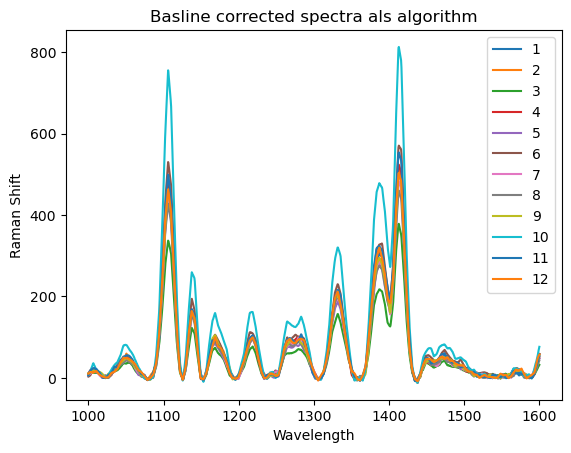

In [12]:
for index, row in df2.iterrows():
    plt.plot(row.keys(), row.values, label=index+1)
plt.title("Basline corrected spectra als algorithm")
plt.xlabel("Wavelength")
plt.ylabel("Raman Shift")
plt.legend()
plt.show()

9. Scale the data for PCA preparation.

In [13]:
scaled = StandardScaler().fit_transform(df2.values)

print(scaled)

[[ 0.41686857  0.52432787  0.46661058 ...  0.21011071  0.28548079
   0.45630822]
 [-0.68165674 -0.52701005 -0.59595159 ...  0.65827205  0.60805782
   0.56444419]
 [ 0.96666017  1.05260223  0.60735744 ... -2.09152614 -2.10744063
  -2.09038846]
 ...
 [-0.54872949 -0.37200433 -0.01408376 ...  2.1972822   2.23745115
   2.25710389]
 [-0.54559216 -0.40066727  0.3184193  ...  0.03257258 -0.00272802
  -0.02623045]
 [ 0.841973    0.57399396  0.52932583 ...  0.66408505  0.50398905
   0.36282399]]


10. Create the pca object.

In [14]:
# Fit PCA model
pca = PCA()

11. Perform PCA on the baseline corrected spectra.

In [15]:
pca_dt = pca.fit_transform(scaled)
print(pca_dt[:5])

[[-1.41363290e+00 -1.05185695e+01 -5.59228948e+00  5.81748917e+00
  -7.29553307e+00  1.14370359e+01  1.24795777e+01  8.90375693e-01
   2.30965213e+00  3.75694571e-01  2.56894914e+00  4.84830653e-15]
 [-4.96658837e+00 -1.23779082e+01  3.16907191e+00 -8.56127582e+00
  -7.27399848e+00 -1.26687720e+00 -6.34303193e+00 -6.73591220e+00
  -6.77413757e+00 -7.41455227e+00  3.55417215e+00  4.84830653e-15]
 [-4.11401222e+01  6.69913305e+00  9.66826453e-01  3.31246241e+00
   4.96125043e+00  3.00548385e+00 -3.59264839e+00  2.44370051e+00
  -7.01981483e+00  6.67387490e+00  8.55924587e+00  4.84830653e-15]
 [-3.37685472e+00  1.25777221e+00  2.81452798e-01 -9.41947864e+00
   9.14783698e+00 -4.86449890e-01 -4.16268585e-02 -4.12790368e+00
   1.36106623e+01 -1.63901868e+00  5.43071624e+00  4.84830653e-15]
 [-1.26524409e+01  4.47075422e+00 -1.12423918e+01  1.29356391e+01
  -1.62793823e+00 -5.21661631e+00 -4.97544497e+00  7.07562889e+00
   2.92968586e+00 -8.72748316e+00  6.99969337e-02  4.84830653e-15]]


12. Create new dataframe for PCA results.

In [16]:
pca_df = pd.DataFrame(pca_dt, columns=[f"PC{x + 1}" for x, y in enumerate(pca_dt)])

display(pca_df)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
0,-1.413633,-10.518569,-5.592289,5.817489,-7.295533,11.437036,12.479578,0.890376,2.309652,0.375695,2.568949,4.848307e-15
1,-4.966588,-12.377908,3.169072,-8.561276,-7.273998,-1.266877,-6.343032,-6.735912,-6.774138,-7.414552,3.554172,4.848307e-15
2,-41.140122,6.699133,0.966826,3.312462,4.961250,3.005484,-3.592648,2.443701,-7.019815,6.673875,8.559246,4.848307e-15
3,-3.376855,1.257772,0.281453,-9.419479,9.147837,-0.486450,-0.041627,-4.127904,13.610662,-1.639019,5.430716,4.848307e-15
4,-12.652441,4.470754,-11.242392,12.935639,-1.627938,-5.216616,-4.975445,7.075629,2.929686,-8.727483,0.069997,4.848307e-15
5,14.277830,22.746623,1.872603,0.125297,-6.253164,3.286355,3.411038,-8.826048,-1.851917,-2.140856,-1.907213,4.848307e-15
6,-11.284798,1.304846,6.321942,-8.490855,-5.011890,9.523280,-8.165903,8.883933,3.368178,1.752524,-6.729231,4.848307e-15
7,-17.404073,-0.185094,-4.988616,-9.843842,11.065550,-3.188409,9.671098,3.406802,-6.695559,-3.060768,-5.771544,4.848307e-15
8,-5.327133,-3.347730,-13.525542,-2.860324,-7.456799,-9.511717,-1.789940,-4.329010,1.936761,9.473859,-3.268145,4.848307e-15
9,79.596925,-0.379055,-2.501263,-1.459826,3.610698,-0.255208,-2.133338,5.778388,-3.430775,2.067652,3.265165,4.848307e-15


13. Create PCA plot of PC1 vs PC2.

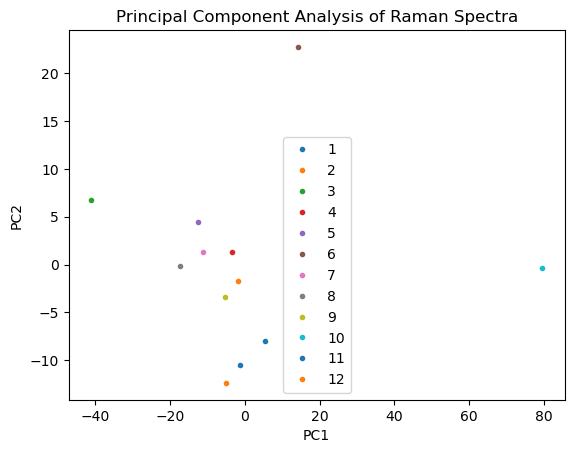

In [17]:

labels = pca_df.index.values

for x, y, z in zip(pca_df["PC1"], pca_df["PC2"], labels):

    plt.plot(x, y, marker=".", linestyle='', label=z+1)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Principal Component Analysis of Raman Spectra")
plt.legend(loc="best")
plt.show()

14. Get the varaince values (as a percentage) from the PCA data.

In [18]:
pca_var = pca.explained_variance_ratio_*100

15. Plot the PCA variance as a bar chart. Most of the variance can be attributed to PC1. 

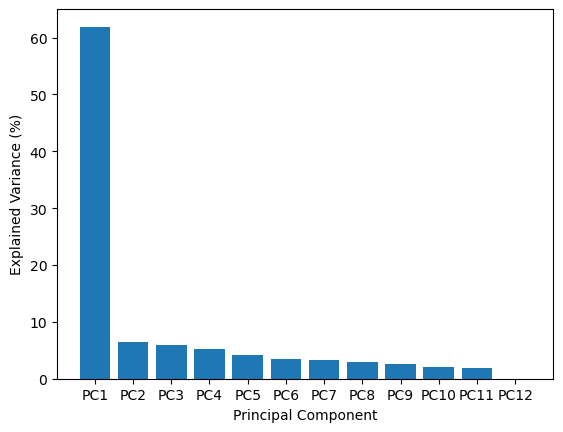

In [19]:
plt.bar(x=[f"PC{x+1}" for x, y in enumerate(pca_var)], height=pca_var)
plt.ylabel("Explained Variance (%)")
plt.xlabel("Principal Component")
plt.show()